# Random Walk - Pro India Data Science Level-2 Assessment 

# Q1

In [2]:
import pandas as pd

penguins_df = pd.read_csv("dataset.csv")

penguins_df['bill_length_mm'].fillna(penguins_df['bill_length_mm'].median(), inplace=True)
penguins_df['bill_depth_mm'].fillna(penguins_df['bill_depth_mm'].median(), inplace=True)
penguins_df['flipper_length_mm'].fillna(penguins_df['flipper_length_mm'].median(), inplace=True)
penguins_df['body_mass_g'].fillna(penguins_df['body_mass_g'].median(), inplace=True)

penguins_df['sex'].fillna('Unknown', inplace=True)

penguins_df.drop_duplicates(inplace=True)

penguins_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


C:\Users\bhuva\AppData\Local\Temp\ipykernel_39208\2551227201.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins_df['bill_length_mm'].fillna(penguins_df['bill_length_mm'].median(), inplace=True)
C:\Users\bhuva\AppData\Local\Temp\ipykernel_39208\2551227201.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

# Q2

In [3]:
gentoo_avg_body_mass = penguins_df[penguins_df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"The average body mass for Gentoo penguins is {gentoo_avg_body_mass}")

The average body mass for Gentoo penguins is 5125.0


# Q3

In [4]:
from scipy.stats import skew, kurtosis

def distribution_analysis(df, feature):
    analysis = {}
    for species in df['species'].unique():
        data = df[df['species'] == species][feature]
        analysis[species] = {
            'Skewness': skew(data),
            'Kurtosis': kurtosis(data)
        }
    return analysis

bill_length_analysis = distribution_analysis(penguins_df, 'bill_length_mm')
bill_depth_analysis = distribution_analysis(penguins_df, 'bill_depth_mm')

print("Bill Length Analysis:", bill_length_analysis)
print("Bill Depth Analysis:", bill_depth_analysis)


Bill Length Analysis: {'Adelie': {'Skewness': 0.1664747497317031, 'Kurtosis': -0.2244853076721096}, 'Gentoo': {'Skewness': 0.720892965403421, 'Kurtosis': 1.177040149399649}, 'Chinstrap': {'Skewness': -0.09320278848611344, 'Kurtosis': -0.11906906387411009}}
Bill Depth Analysis: {'Adelie': {'Skewness': 0.32956749247508915, 'Kurtosis': -0.09603933294231926}, 'Gentoo': {'Skewness': 0.3464126768963668, 'Kurtosis': -0.5844485613331551}, 'Chinstrap': {'Skewness': 0.0067259608078862046, 'Kurtosis': -0.898739653084359}}


# Q4

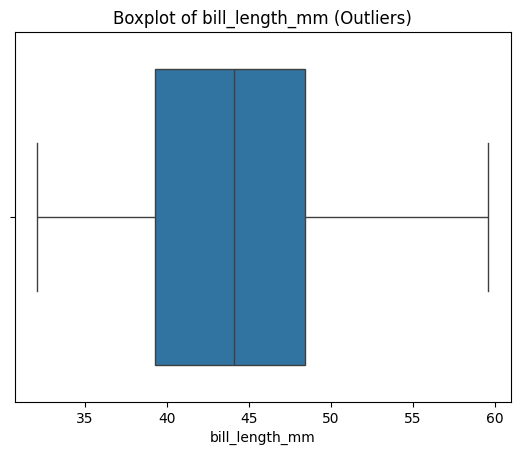

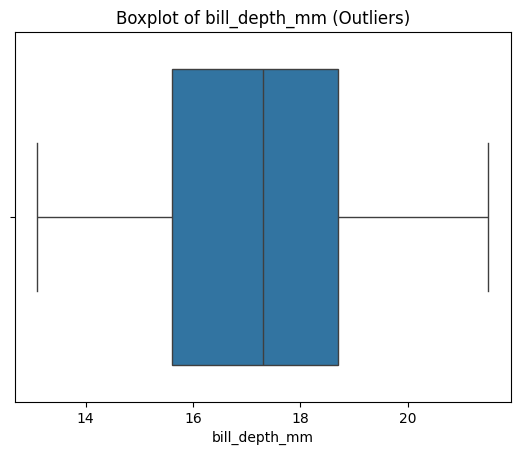

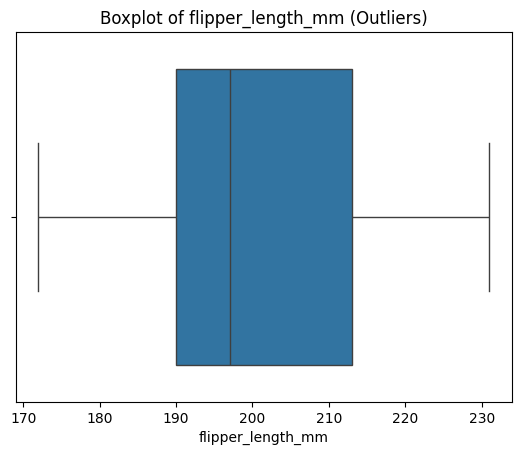

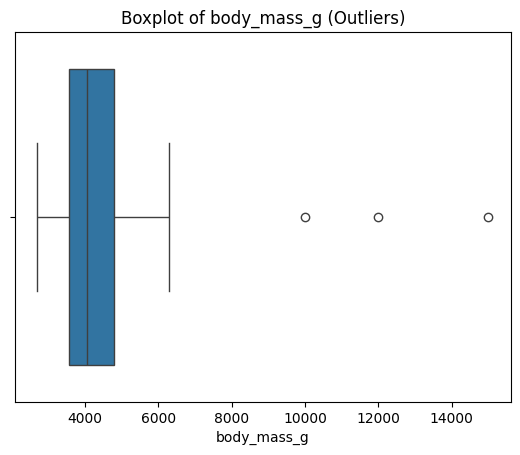

Outliers in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in bill_depth_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in flipper_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in body_mass_g:
        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.boxplot(x=penguins_df[column])
    plt.title(f'Boxplot of {column} (Outliers)')
    plt.show()

for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    outliers = detect_outliers(penguins_df, column)
    print(f"Outliers in {column}:\n", outliers)


# Q5

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

num_features = len(numerical_features)
num_samples = len(penguins_df)
print(f"Number of features: {num_features}")
print(f"Number of samples: {num_samples}")

if num_features >= num_samples:
    print("The dataset suffers from the curse of dimensionality.")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(penguins_df[numerical_features])
    
    pca = PCA(n_components=2)  
    X_pca = pca.fit_transform(X_scaled)
    
    pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    
    pca_df['species'] = penguins_df['species']

    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='species')
    plt.title("PCA of Penguin Dataset")
    plt.show()
else:
    print("The dataset does not suffer from the curse of dimensionality, no PCA needed.")



Number of features: 4
Number of samples: 344
The dataset does not suffer from the curse of dimensionality, no PCA needed.


# Q6

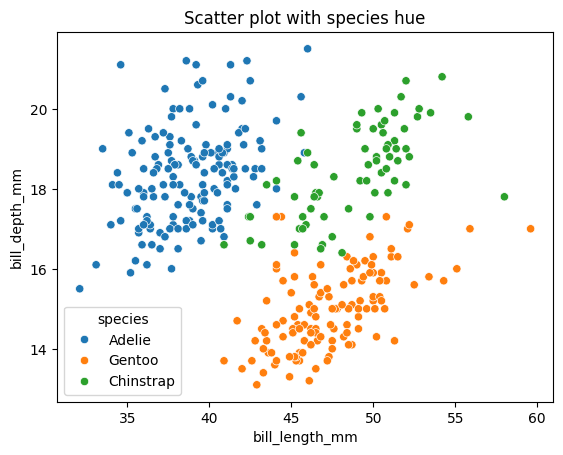

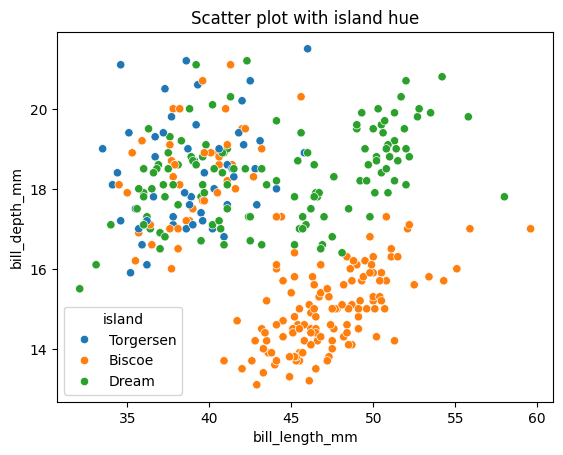

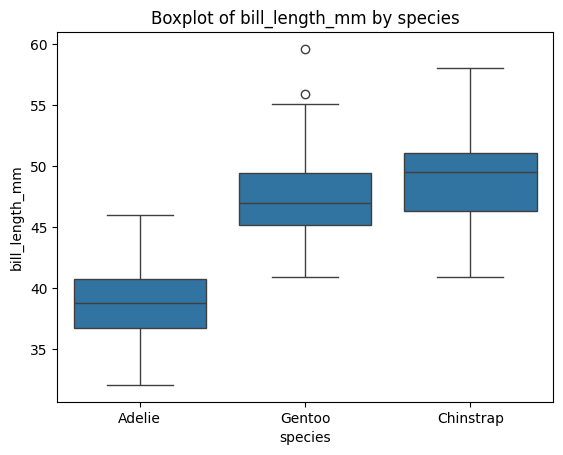

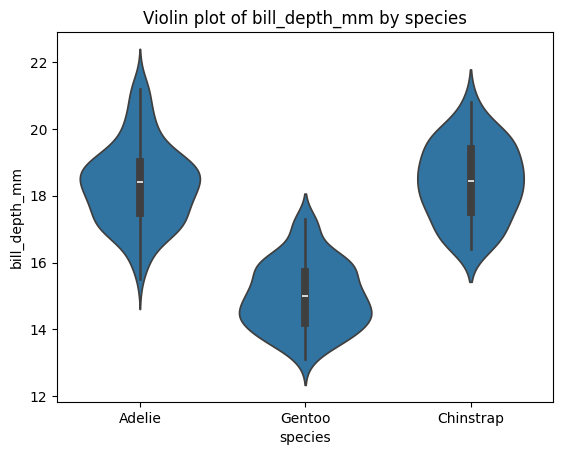

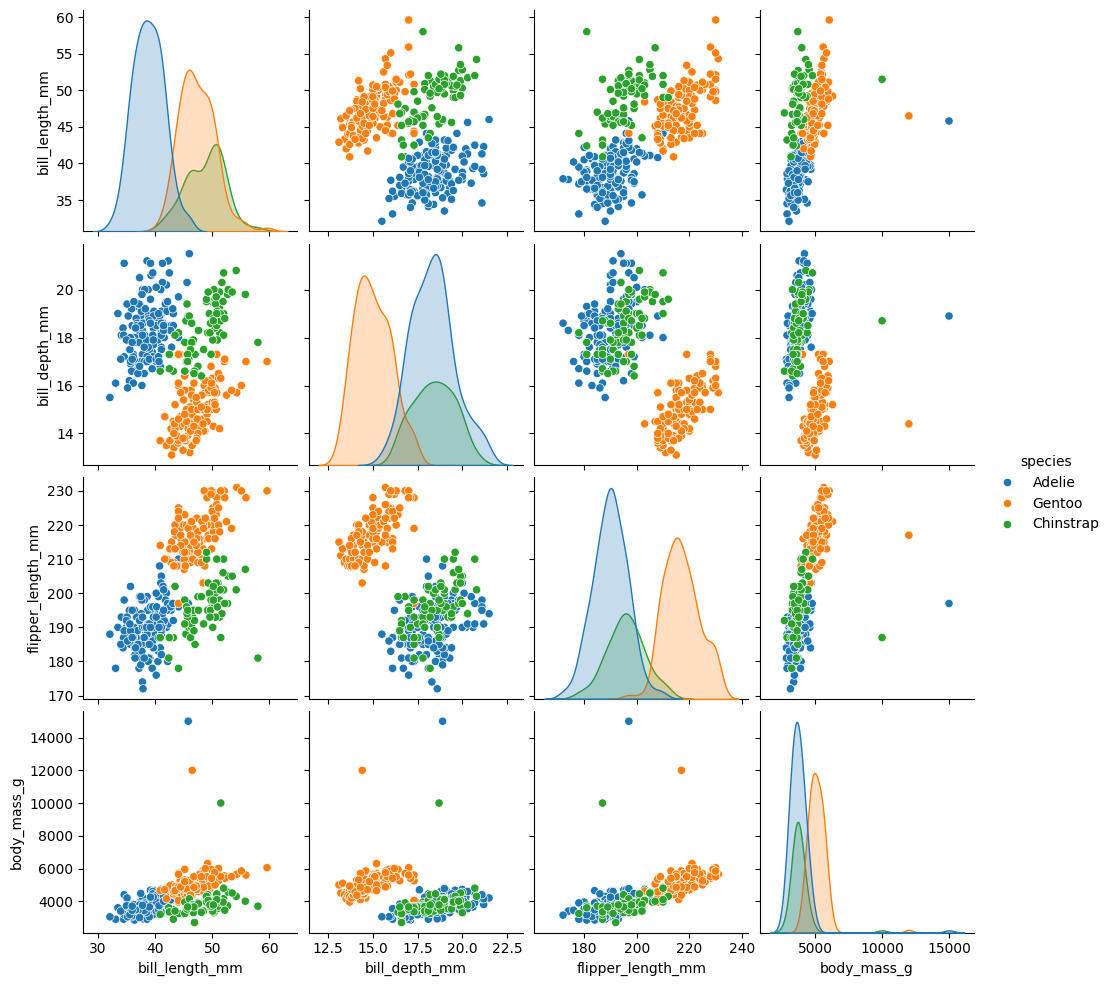

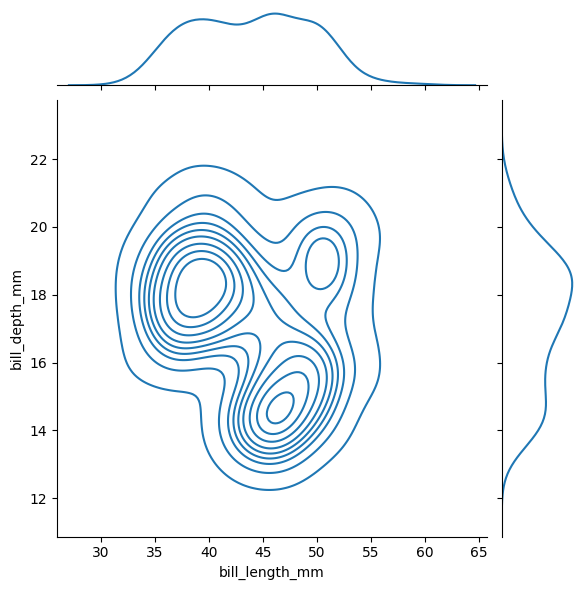

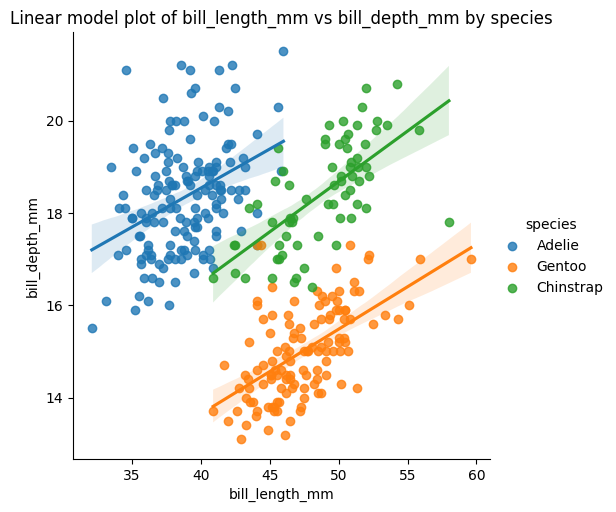

In [9]:
sns.scatterplot(data=penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title("Scatter plot with species hue")
plt.show()

sns.scatterplot(data=penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='island')
plt.title("Scatter plot with island hue")
plt.show()

sns.boxplot(data=penguins_df, x='species', y='bill_length_mm')
plt.title("Boxplot of bill_length_mm by species")
plt.show()

sns.violinplot(data=penguins_df, x='species', y='bill_depth_mm')
plt.title("Violin plot of bill_depth_mm by species")
plt.show()

sns.pairplot(penguins_df, hue='species')
# plt.title("Pairplot of all features by species")
plt.show()

sns.jointplot(data=penguins_df, x='bill_length_mm', y='bill_depth_mm', kind='kde')
# plt.title("Joint KDE plot of bill_length_mm vs bill_depth_mm")
plt.show()

sns.lmplot(data=penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title("Linear model plot of bill_length_mm vs bill_depth_mm by species")
plt.show()


# Q7

In [13]:
max_flipper_length = penguins_df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print(max_flipper_length)

longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]
print("Species with the longest flippers on each island:\n", longest_flippers)


     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0
Species with the longest flippers on each island:
      species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


# Q8

In [14]:
from scipy.stats import zscore

penguins_normalized = penguins_df.copy()
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_normalized[numerical_cols] = penguins_normalized[numerical_cols].apply(zscore)

print(penguins_normalized.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.883054       0.787289          -1.420541   
1  Adelie  Torgersen       -0.809180       0.126114          -1.063485   
2  Adelie  Torgersen       -0.661432       0.431272          -0.420786   
3  Adelie  Torgersen        0.040373       0.075255          -0.277964   
4  Adelie  Torgersen       -1.326299       1.092447          -0.563608   

   body_mass_g      sex  
0    -0.468990     male  
1    -0.424125   female  
2    -0.917634   female  
3    -0.199803  Unknown  
4    -0.738176   female  
